## Домашняя работа 3

### VK API

In [1]:
import vk

In [2]:
from credentials import *

session = vk.AuthSession(id_app, login, password, scope='wall')
vk_api = vk.API(session)


**Задача 1. Формирование корпуса текстов** (10 баллов) 

Найдите две или более группы, которые публикуют достаточно содержательные посты (например, новости и т.п.). Тематика групп должна быть различной. 

С помощью [wall.get](https://vk.com/dev/wall.get) скачайте посты данных групп и сформируйте корпуса текстов, используя возможности [pandas](https://pythonspot.com/category/pandas/).

In [3]:
import pandas as pd

РБК

In [4]:
id_RBK = vk_api.utils.resolveScreenName(v = 5.73, screen_name='rbc')

In [5]:
id_RBK

{'object_id': 25232578, 'type': 'group'}

In [6]:
RBC = vk_api.wall.get(v = 5.73,
                      owner_id = -25232578,
                      domain = 'https://vk.com/rbc',
                      count = 100)

In [7]:
rbc_corpus = pd.DataFrame([i['text'] for i in RBC['items']])
rbc_corpus.columns = ['text']

In [8]:
rbc_corpus.head()

,text
0,Организаторы ЧМ по футболу за 100 дней до его ...
1,«Мужчина выглядел абсолютно не в себе. А по вр...
2,В Киеве автомобиль сопровождения из кортежа пр...
3,"«Он находится в сознании и дышит, но рана на г..."
4,Власти Бельгии начали раздачу пастилок с йодом...


Just a story

In [9]:
id_js = vk_api.utils.resolveScreenName(v = 5.73, screen_name='just_str')

In [10]:
id_js

{'object_id': 106084026, 'type': 'group'}

In [11]:
just_str = vk_api.wall.get(v = 5.73,
                           owner_id = -106084026,
                           domain = 'https://vk.com/just_str',
                           count = 100)

In [12]:
js_corpus = pd.DataFrame([i['text'] for i in just_str['items']])
js_corpus.columns = ['text']

In [13]:
js_corpus.head()

,text
0,"Это было далекое лето, мне было 7 и я беспечно..."
1,Подарок для жены\n\nНе помню на какой именно п...
2,Про неловкие ситуации\n\nКогда я была маленько...
3,Друг...\n\nШел сегодня на работу. Мимо проезжа...
4,Любовь до смерти\n\nМои бабушка и дедушка роди...


**Задача 2. Предобработка ** (15 баллов)

Предобработайте корпуса текстов: 
* Очистите тексты от мусора, используя [регулярные выражения](https://docs.python.org/2/library/re.html)
* [Лемматизируйте текст](https://github.com/arinaaageeva/Lemmatization)
* Удалите стоп-слова

Список стоп-слов можно получить с помощью модуля [stop-words](https://pypi.python.org/pypi/stop-words)

In [52]:
import re
from nltk.tokenize import TreebankWordTokenizer
import pymorphy2

In [94]:
from stop_words import get_stop_words

STW = get_stop_words('russian')
new = ['это', 'который', 'один', 'что', 'мой', 'свой']
SW = STW + new

In [37]:
lem = pymorphy2.MorphAnalyzer()

In [74]:
def preprocess(list_of_texts): #чистим и лемматизируем
    
    filtered_texts = []
    
    for text in list_of_texts:
        tokenized_text = TreebankWordTokenizer().tokenize(text.lower())
    
        wordsFiltered = []
 
        for w in tokenized_text:
            for wf in re.findall(r'(?u)([А-я]+)', w):
                for wfreal in re.findall(r'(\D+)', wf):
                    a = lem.parse(wfreal)[0].normal_form
                    wordsFiltered.append(''.join(a))
    
        filtered_texts.append(wordsFiltered)
    
    return filtered_texts


In [54]:
def stopWds(list_of_texts, list_of_SW): #удаляем стоп-слова
    preprocessed_texts = []
    text = []
    
    for txt in list_of_texts:
        for w in txt:
            if w not in list_of_SW:
                text.append(w)
            
        preprocessed_texts.append(' '.join(text))
        text = []
                
    return preprocessed_texts

In [116]:
def onestr(list_of_strings): # преобразуем список строк в одну строку
    strings = []
    for s in list_of_strings:
        strings.append(''.join(s))
        
    return strings

In [46]:
def to_upd_df(list_of_texts): # преобразуем список текстов в датафрейм
    
    new_texts_df = pd.DataFrame({'col': list_of_texts})
    new_texts_df.columns = ['text']

    return new_texts_df

Предобработка Just a story

In [75]:
clear_js = preprocess(js_corpus['text'])

In [76]:
print(clear_js[0])

['это', 'быть', 'далёкий', 'лето', 'я', 'быть', 'и', 'я', 'беспечно', 'жить', 'у', 'бабушка', 'в', 'деревня', 'ожидать', 'поступление', 'в', 'школа', 'участок', 'у', 'мы', 'большой', 'есть', 'где', 'развеяться', 'и', 'побегать', 'из', 'живность', 'быть', 'кура', 'собака', 'да', 'кошка', 'муська', 'заядлый', 'охотница', 'и', 'вот', 'в', 'один', 'чудесный', 'июльский', 'день', 'я', 'увидеть', 'как', 'муська', 'тащить', 'в', 'зуб', 'что', 'то', 'большой', 'обычно', 'это', 'быть', 'мышка', 'или', 'кротёнок', 'но', 'тут', 'быть', 'что', 'то', 'явно', 'больший', 'размер', 'и', 'я', 'заинтересоваться', 'догнать', 'кошка', 'оказаться', 'не', 'трудно', 'трудно', 'оказаться', 'вытащить', 'добыча', 'мой', 'взор', 'предстать', 'мокрый', 'сорочонок', 'с', 'явно', 'повредить', 'лапа', 'малыш', 'ещё', 'дышать', 'но', 'быть', 'такой', 'слабый', 'что', 'даже', 'не', 'трепыхаться', 'бабушка', 'осмотреть', 'птенец', 'сказать', 'что', 'он', 'не', 'жилец', 'и', 'хотеть', 'отдать', 'он', 'обратно', 'кошка',

In [98]:
js_noSW = stopWds(clear_js, SW)
js_noSW[0]

'далёкий лето беспечно жить бабушка деревня ожидать поступление школа участок большой развеяться побегать живность кура собака кошка муська заядлый охотница чудесный июльский увидеть муська тащить зуб большой мышка кротёнок явно больший размер заинтересоваться догнать кошка оказаться трудно трудно оказаться вытащить добыча взор предстать мокрый сорочонок явно повредить лапа малыш дышать слабый трепыхаться бабушка осмотреть птенец жилец отдать обратно кошка поднять рёв остаться ничто оставить сорочонок подробный осмотр оказаться лапка ничто повредить птенец слабый лапа промыть забинтовать заживать сорочонок посадить большой коробка соорудить сетка ткань вроде вольер кошка смочь покуситься птенчик назвать кивино кричать киви киви спасть терпеть перевязка рана подсохнуть стать заживать кивина начать ходить вольер пробовать чиститься месяц лапа полностью зажить кивина начать активно гулять привязаться бегать хвостик любить кошачий корма нагло воровать муськина миска осмелеть стать тырить п

In [99]:
new_js = to_upd_df(js_noSW)
new_js.head()

,text
0,далёкий лето беспечно жить бабушка деревня ожи...
1,подарок жена помнить праздник папа решить сдел...
2,неловкий ситуация маленькая читать энциклопеди...
3,друг идти работа проезжать автобус заметить др...
4,любовь смерть бабушка дедушка родиться бабушка...


Предобработка РБК

In [100]:
clear_rbc = preprocess(rbc_corpus['text'])

In [101]:
print(clear_rbc[:5])

[['организатор', 'чм', 'по', 'футбол', 'за', 'день', 'до', 'он', 'начало', 'опубликовать', 'видео', 'с', 'флешмоб', 'в', 'который', 'принять', 'участие', 'известный', 'футболист', 'в', 'конец', 'ролик', 'появляться', 'путин', 'играть', 'в', 'футбол', 'с', 'главый', 'инфантино'], ['мужчина', 'выглядеть', 'абсолютно', 'не', 'в', 'себя', 'а', 'по', 'время', 'то', 'быть', 'ещё', 'день', 'около', 'я', 'подумать', 'странноватый', 'время', 'чтобы', 'быть', 'уже', 'настолько', 'пьяный', 'жительница', 'солсбери', 'рассказать', 'о', 'состояние', 'экс', 'разведчик', 'скрипалить', 'который', 'быть', 'отравить', 'март', 'неизвестный', 'вещество'], ['в', 'киев', 'автомобиль', 'сопровождение', 'из', 'кортеж', 'президент', 'украина', 'петра', 'порошенко', 'сбить', 'пожилое', 'мужчина', 'он', 'перебегать', 'дорога', 'проигнорировать', 'запрет', 'регулировщик'], ['он', 'находиться', 'в', 'сознание', 'и', 'дышать', 'но', 'рана', 'на', 'голов', 'кровоточить', 'сотрудник', 'врезаться', 'в', 'стена', 'новый

In [102]:
rbc_noSW = stopWds(clear_rbc, SW)

In [103]:
print(rbc_noSW[:5])

['организатор чм футбол начало опубликовать видео флешмоб принять участие известный футболист конец ролик появляться путин играть футбол главый инфантино', 'мужчина выглядеть абсолютно подумать странноватый настолько пьяный жительница солсбери рассказать состояние экс разведчик скрипалить отравить март неизвестный вещество', 'киев автомобиль сопровождение кортеж президент украина петра порошенко сбить пожилое мужчина перебегать дорога проигнорировать запрет регулировщик', 'находиться сознание дышать рана голов кровоточить сотрудник врезаться стена новый штаб квартира дирекция запрещать обклеивать предупреждать стикер', 'власть бельгия начать раздача пастилка йод гражданин жить радиус километр работать страна аэс учёт территория государство пастилка получить житель бельгия']


In [104]:
new_rbc = to_upd_df(rbc_noSW)
new_rbc.head()

,text
0,организатор чм футбол начало опубликовать виде...
1,мужчина выглядеть абсолютно подумать страннова...
2,киев автомобиль сопровождение кортеж президент...
3,находиться сознание дышать рана голов кровоточ...
4,власть бельгия начать раздача пастилка йод гра...


** Задача 3. Выделение признаков** (5 баллов)

Воспользуйтесь [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) для векторизации текстов. 

In [191]:
from sklearn.feature_extraction.text import TfidfVectorizer

TFVectorizer_js = TfidfVectorizer(stop_words = SW, max_features=100) #задаем max_features = 100,
TFVectorizer_rbc = TfidfVectorizer(stop_words = SW, max_features=100)#чтобы выделить первые сто топ-токенов

In [106]:
vect_js = TFVectorizer_js.fit_transform(new_js['text'])

In [107]:
vect_rbc = TFVectorizer_rbc.fit_transform(new_rbc['text'])

In [108]:
fn_js = TFVectorizer_js.get_feature_names()
print(fn_js)

['бабушка', 'большой', 'брат', 'брать', 'бывать', 'взять', 'видеть', 'владимир', 'водитель', 'вообще', 'вопрос', 'вс', 'выйти', 'гараж', 'глаз', 'говорить', 'город', 'давать', 'далее', 'дать', 'девушка', 'делать', 'дело', 'деньга', 'директор', 'должный', 'дом', 'друг', 'думать', 'ехать', 'ещ', 'женщина', 'жить', 'звонок', 'знакомый', 'знать', 'игра', 'идти', 'история', 'класс', 'комната', 'конец', 'литр', 'лицо', 'любить', 'мама', 'машина', 'место', 'месяц', 'метр', 'минута', 'муж', 'мужик', 'найти', 'начать', 'начинать', 'неделя', 'ничто', 'нога', 'нормальный', 'общий', 'оказаться', 'окно', 'ответ', 'отвечать', 'папа', 'пара', 'парень', 'подходить', 'пойти', 'понимать', 'понять', 'приехать', 'прийти', 'просить', 'пытаться', 'работа', 'работать', 'рассказывать', 'ребёнок', 'решить', 'рука', 'самый', 'сделать', 'сидеть', 'слышать', 'смотреть', 'собака', 'сосед', 'спрашивать', 'сразу', 'стать', 'телефон', 'туалет', 'увидеть', 'форточка', 'хороший', 'час', 'часы', 'школа']


In [109]:
fn_rbc = TFVectorizer_rbc.get_feature_names()
print(fn_rbc)

['александр', 'алексей', 'американский', 'анджелес', 'бывший', 'бюджет', 'вашингтон', 'владимир', 'власть', 'влияние', 'вмешательство', 'военный', 'восточный', 'вручение', 'выбор', 'газпром', 'глава', 'грудинин', 'группа', 'гута', 'дать', 'дело', 'депутат', 'должный', 'доход', 'заявить', 'известный', 'кампания', 'канал', 'кандидат', 'киев', 'компания', 'крупный', 'лос', 'март', 'ми', 'миллиард', 'миллион', 'мировой', 'мосгордума', 'москва', 'мужчина', 'назвать', 'напасть', 'находиться', 'начало', 'нея', 'новый', 'обвинять', 'ограничение', 'оон', 'оскар', 'отравление', 'переговоры', 'показать', 'получить', 'последний', 'президент', 'премия', 'пресс', 'проблема', 'путин', 'работа', 'работать', 'разведчик', 'разработка', 'ранее', 'рассказать', 'рбк', 'речь', 'решение', 'решить', 'российский', 'россия', 'рубль', 'самопровозгласить', 'сеть', 'система', 'собчак', 'сообщить', 'стать', 'страна', 'сумма', 'счёт', 'сша', 'территория', 'тысяча', 'увеличиться', 'украина', 'украинский', 'умный', 'у

**Задача 4. Визуализация** (5 баллов)

Визуализируйте токены для каждого сообщества с помощью [WORDCLOUD](https://python-graph-gallery.com/wordcloud/)

In [110]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [118]:
js_words = []

for text in new_js['text']:
    for word in text.split(' '):
        js_words.append(word)

txt_js = ' '.join(js_words)

In [119]:
rbc_words = []

for text in new_rbc['text']:
    for word in text.split(' '):
        rbc_words.append(word)

txt_rbc = ' '.join(rbc_words)

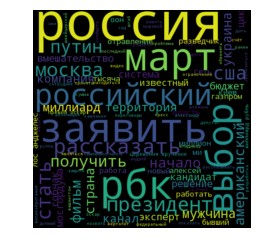

In [121]:
wordcloud_rbc = WordCloud(width=480, height=480, margin=0, max_words=100).generate(txt_rbc)
 
# Display the generated image:
plt.imshow(wordcloud_rbc, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

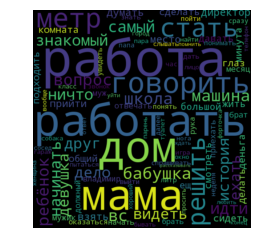

In [120]:
wordcloud_js = WordCloud(width=600, height=600, margin=0, max_words=100).generate(txt_js)
 
# Display the generated image:
plt.imshow(wordcloud_js, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

**Задача 5. Поиск коллокаций** (15 баллов)

Для каждого сообщества найдите статистические значиммые коллокации с помощью PMI

In [130]:
from math import log

In [169]:
def words_to_dict(list_of_texts): #получаем словарь частотности по униграммам + Bag of words

    bag_of_words = []

    for txt in list_of_texts:
        for wrd in txt.split():
            bag_of_words.append(wrd)
        
    unique_words = list(set(bag_of_words))

    numbers = []
    for item in unique_words:
        word_num = bag_of_words.count(item)
        numbers.append(word_num)
    
    dictionary = dict(zip(unique_words, numbers))
    
    return dictionary, bag_of_words

In [170]:
def bigrams_to_dict(list_of_texts): # получаем словарь частотности по биграммам + список биграмм
    
    bag_of_bigrams = []
    
    for text in list_of_texts:
        txt = list(text.split(' '))
        for word in range(1, len(txt) - 1):
            bag_of_bigrams.append(' '.join([txt[word - 1], txt[word]]))
    
    unique_bigrams = list(set(bag_of_bigrams))
    
    count = []
    
    for item in unique_bigrams:
        bi_count = bag_of_bigrams.count(item)
        count.append(bi_count)
    
    dictionary = dict(zip(unique_bigrams, count))
    
    return dictionary, bag_of_bigrams

In [183]:
def freq_sort(dictionary): #из словаря частотности получаем список ключей, отсортированных в порядке убывания частотности
    dict_words = list(dictionary.keys())
    dict_freq = list(dictionary.values())

    almost_done = list(zip(dict_words, dict_freq))
    almost_done.sort(key = lambda almost_done: almost_done[1], reverse=True)
    
    return almost_done

In [172]:
rbc_words, rbcBOG = words_to_dict(new_rbc['text'])
print(len(rbc_words), len(rbcBOG))

1084 1629


In [173]:
js_words, jsBOG = words_to_dict(new_js['text'])
print(len(js_words), len(jsBOG))

3725 8001


In [174]:
rbc_bi, rbc_biBOG = bigrams_to_dict(new_rbc['text'])
print(len(rbc_bi), len(rbc_biBOG))

1375 1429


In [175]:
js_bi, js_biBOG = bigrams_to_dict(new_js['text'])
print(len(js_bi), len(js_biBOG))

7659 7803


In [178]:
#РБК
pmi_rbc = {}

for bi in rbc_biBOG:
    x1, y1  = bi.split()
    p_xy1 = rbc_bi[' '.join([x1, y1])]/len(rbc_biBOG)
    p_x1, p_y1 = rbc_words[x1]/len(rbcBOG), rbc_words[y1]/len(rbcBOG)
    pmi1 = log(p_xy1/(p_x1 * p_y1))
    pmi_rbc[bi] = pmi1


In [181]:
#значимые коллокации РБК
rbc_collocations = freq_sort(pmi_rbc)

In [190]:
rbc_collocations[:100]

[('футболист конец', 7.526713039274223),
 ('конец ролик', 7.526713039274223),
 ('ролик появляться', 7.526713039274223),
 ('выглядеть абсолютно', 7.526713039274223),
 ('абсолютно подумать', 7.526713039274223),
 ('подумать странноватый', 7.526713039274223),
 ('странноватый настолько', 7.526713039274223),
 ('настолько пьяный', 7.526713039274223),
 ('пьяный жительница', 7.526713039274223),
 ('жительница солсбери', 7.526713039274223),
 ('автомобиль сопровождение', 7.526713039274223),
 ('петра порошенко', 7.526713039274223),
 ('порошенко сбить', 7.526713039274223),
 ('сбить пожилое', 7.526713039274223),
 ('перебегать дорога', 7.526713039274223),
 ('дорога проигнорировать', 7.526713039274223),
 ('сознание дышать', 7.526713039274223),
 ('дышать рана', 7.526713039274223),
 ('рана голов', 7.526713039274223),
 ('голов кровоточить', 7.526713039274223),
 ('врезаться стена', 7.526713039274223),
 ('квартира дирекция', 7.526713039274223),
 ('дирекция запрещать', 7.526713039274223),
 ('запрещать обклеи

In [185]:
#Just a story
pmi_js = {}

for bi in js_biBOG:
    x2, y2  = bi.split()
    p_xy2 = js_bi[' '.join([x2, y2])]/len(js_biBOG)
    p_x2, p_y2 = js_words[x2]/len(jsBOG), js_words[y2]/len(jsBOG)
    pmi2 = log(p_xy2/(p_x2 * p_y2))
    pmi_js[bi] = pmi2


In [186]:
#значимые коллокации Just a story
js_collocations = freq_sort(pmi_js)

In [189]:
js_collocations[:100]

[('развеяться побегать', 9.012380071583486),
 ('заядлый охотница', 9.012380071583486),
 ('охотница чудесный', 9.012380071583486),
 ('чудесный июльский', 9.012380071583486),
 ('заинтересоваться догнать', 9.012380071583486),
 ('вытащить добыча', 9.012380071583486),
 ('добыча взор', 9.012380071583486),
 ('взор предстать', 9.012380071583486),
 ('предстать мокрый', 9.012380071583486),
 ('промыть забинтовать', 9.012380071583486),
 ('покуситься птенчик', 9.012380071583486),
 ('терпеть перевязка', 9.012380071583486),
 ('перевязка рана', 9.012380071583486),
 ('рана подсохнуть', 9.012380071583486),
 ('кошачий корма', 9.012380071583486),
 ('корма нагло', 9.012380071583486),
 ('муськина миска', 9.012380071583486),
 ('миска осмелеть', 9.012380071583486),
 ('кусок тухлый', 9.012380071583486),
 ('полметра подкидывать', 9.012380071583486),
 ('махать крылышко', 9.012380071583486),
 ('крылышко мягко', 9.012380071583486),
 ('мягко приземляться', 9.012380071583486),
 ('улететь насовсем', 9.012380071583486